# Capstone project < Trirat Arromrit KMUTT >

### This project have 4 parts.
#### Part 1 : Data acquisition
#### Part 2 : Data Preprocessing
#### Part 3 : Text processing
#### Part 4 : Data visulization

In [1]:
#Import library and package 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import nltk
from wordcloud import WordCloud
import regex as re
from collections import Counter
import gdown
import matplotlib as mpl

## Part 1 : Data acquisition

In [2]:
#Import dataset from google drive
#Link to data set : https://drive.google.com/file/d/1nbVUyeS69ooJBrBoSB2js58UaQwpHhJM/view?usp=sharing
#!gdown --id 1nbVUyeS69ooJBrBoSB2js58UaQwpHhJM

In [3]:
dataset = pd.read_csv('D:\Freshy_KMUTT_PCCMS\HDS-YEAR-3\HON001 Data visualization\data_scientist_united_states_job_postings_jobspikr.csv')
dataset.head()

job_title                           category  \
0                           Data Scientist                 Accounting/Finance   
1                           Data Scientist              Accounting-or-finance   
2                           Data Scientist              Accounting-or-finance   
3                           Data Scientist  business and financial operations   
4  Solution Engineer/Data Scientist Intern               Computer-or-internet   

                                        company_name        city state  \
0                                       Regions Bank  Birmingham    AL   
1                         Regions Bank 2,356 reviews  Birmingham    AL   
2        Regions Bank 2,363 reviews - Birmingham, AL  Birmingham    AL   
3                                  Kforce Technology  Birmingham    AL   
4  Company Info Follow Get job updates from SAIC ...  Huntsville    AL   

  country inferred_city inferred_state  post_date  \
0     Usa    Birmingham        Alabama   2/4/2019   
1      US    Birmingham        Alabama  23/7/2019   
2      US    Birmingham        Alabama  14/8/2019   
3     Usa    Birmingham        Alabama  25/4/2019   
4      US    Huntsville        Alabama   6/8/2019   

                                     job_description   job_type  \
0  Read what people are saying about working here...  Undefined   
1  At Regions, the Data Scientist works with smal...  Undefined   
2  At Regions, the Data Scientist works with smal...  Undefined   
3  RESPONSIBILITIES: Kforce has a client in searc...   Contract   
4  Job Description\n\nDescription\n\nWould you li...  Undefined   

  salary_offered      job_board  
0        Unknown         indeed  
1        Unknown         indeed  
2        Unknown         indeed  
3        Unknown  careerbuilder  
4        Unknown         indeed

In [4]:
dataset.info() #Cheack type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        10000 non-null  object
 1   category         10000 non-null  object
 2   company_name     9999 non-null   object
 3   city             9752 non-null   object
 4   state            9584 non-null   object
 5   country          10000 non-null  object
 6   inferred_city    8980 non-null   object
 7   inferred_state   9484 non-null   object
 8   post_date        10000 non-null  object
 9   job_description  10000 non-null  object
 10  job_type         9999 non-null   object
 11  salary_offered   9999 non-null   object
 12  job_board        9999 non-null   object
dtypes: object(13)
memory usage: 1016.0+ KB


In [5]:
dataset.shape  #Check number row and column of data

(10002, 13)

## Part 2 : Data Prepocessing

In [6]:
dataset.isnull().sum() #Check null data

job_title             2
category              2
company_name          3
city                250
state               418
country               2
inferred_city      1022
inferred_state      518
post_date             2
job_description       2
job_type              3
salary_offered        3
job_board             3
dtype: int64

In [7]:
dataset_clean = dataset.dropna() #Cleansing data and assign to dataset_clean
dataset_clean.head(5)

job_title                           category  \
0                           Data Scientist                 Accounting/Finance   
1                           Data Scientist              Accounting-or-finance   
2                           Data Scientist              Accounting-or-finance   
3                           Data Scientist  business and financial operations   
4  Solution Engineer/Data Scientist Intern               Computer-or-internet   

                                        company_name        city state  \
0                                       Regions Bank  Birmingham    AL   
1                         Regions Bank 2,356 reviews  Birmingham    AL   
2        Regions Bank 2,363 reviews - Birmingham, AL  Birmingham    AL   
3                                  Kforce Technology  Birmingham    AL   
4  Company Info Follow Get job updates from SAIC ...  Huntsville    AL   

  country inferred_city inferred_state  post_date  \
0     Usa    Birmingham        Alabama   2/4/2019   
1      US    Birmingham        Alabama  23/7/2019   
2      US    Birmingham        Alabama  14/8/2019   
3     Usa    Birmingham        Alabama  25/4/2019   
4      US    Huntsville        Alabama   6/8/2019   

                                     job_description   job_type  \
0  Read what people are saying about working here...  Undefined   
1  At Regions, the Data Scientist works with smal...  Undefined   
2  At Regions, the Data Scientist works with smal...  Undefined   
3  RESPONSIBILITIES: Kforce has a client in searc...   Contract   
4  Job Description\n\nDescription\n\nWould you li...  Undefined   

  salary_offered      job_board  
0        Unknown         indeed  
1        Unknown         indeed  
2        Unknown         indeed  
3        Unknown  careerbuilder  
4        Unknown         indeed

In [8]:
print(dataset_clean.shape)
dataset_clean.isnull().sum()

(8885, 13)


job_title          0
category           0
company_name       0
city               0
state              0
country            0
inferred_city      0
inferred_state     0
post_date          0
job_description    0
job_type           0
salary_offered     0
job_board          0
dtype: int64

## Part 3: Text processing

In [9]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

stopwords = set(nltk.corpus.stopwords.words('english'))
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

def ngrams2(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [10]:
pipeline = [str.lower,tokenize,remove_stop,ngrams2]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [11]:
dataset_text = dataset_clean

In [12]:
dataset_text['Keyword'] = dataset_clean['job_description'].apply(prepare, pipeline=pipeline)
dataset_text.head(5)

C:\Users\taira\AppData\Local\Temp\ipykernel_32300\686724103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_text['Keyword'] = dataset_clean['job_description'].apply(prepare, pipeline=pipeline)


job_title                           category  \
0                           Data Scientist                 Accounting/Finance   
1                           Data Scientist              Accounting-or-finance   
2                           Data Scientist              Accounting-or-finance   
3                           Data Scientist  business and financial operations   
4  Solution Engineer/Data Scientist Intern               Computer-or-internet   

                                        company_name        city state  \
0                                       Regions Bank  Birmingham    AL   
1                         Regions Bank 2,356 reviews  Birmingham    AL   
2        Regions Bank 2,363 reviews - Birmingham, AL  Birmingham    AL   
3                                  Kforce Technology  Birmingham    AL   
4  Company Info Follow Get job updates from SAIC ...  Huntsville    AL   

  country inferred_city inferred_state  post_date  \
0     Usa    Birmingham        Alabama   2/4/2019   
1      US    Birmingham        Alabama  23/7/2019   
2      US    Birmingham        Alabama  14/8/2019   
3     Usa    Birmingham        Alabama  25/4/2019   
4      US    Huntsville        Alabama   6/8/2019   

                                     job_description   job_type  \
0  Read what people are saying about working here...  Undefined   
1  At Regions, the Data Scientist works with smal...  Undefined   
2  At Regions, the Data Scientist works with smal...  Undefined   
3  RESPONSIBILITIES: Kforce has a client in searc...   Contract   
4  Job Description\n\nDescription\n\nWould you li...  Undefined   

  salary_offered      job_board  \
0        Unknown         indeed   
1        Unknown         indeed   
2        Unknown         indeed   
3        Unknown  careerbuilder   
4        Unknown         indeed   

                                             Keyword  
0  [read people, people saying, saying working, w...  
1  [regions data, data scientist, scientist works...  
2  [regions data, data scientist, scientist works...  
3  [responsibilities kforce, kforce client, clien...  
4  [job description, description description, des...

In [13]:
def count_words(df, column='Keyword', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [14]:
freq_df = count_words(dataset_text)
freq_df.head(5)

freq
token                  
machine learning  17653
data science      14870
data scientist    13770
years experience   6163
computer science   5901

## Part 4 : Data visualization 

#### Question 1 : What types of jobs are in demand currently? 
#### Question 2 : What are Top 5 category of company is looking for a Data scientist position? 
#### Question 3 : What companies are in need of data scientists the most?
#### Question 4 : Top 10 city are the most application data scienctist ?
#### Question 5 : When we have the most job application open ?
#### Question 6 : What are the data scientists' salaries for most?
#### Question 7 : What is the salary rate for each state?
#### Question 8 : What skills are needed to get a data scientist job?
#### Question 9 : Which website has the most data scientist jobs?

In [15]:
#Set ploting design
colors = sns.color_palette("hls", 8)
plt.style.use('seaborn-white')

#### Question 1 : What types of jobs are in demand currently?

In [16]:
#select data by using grouby function
df_jobtype = dataset_clean['job_type'].value_counts(ascending=False)
df_jobtype

Undefined     5455
Full Time     2967
Contract       456
Part Time        5
Internship       2
Name: job_type, dtype: int64

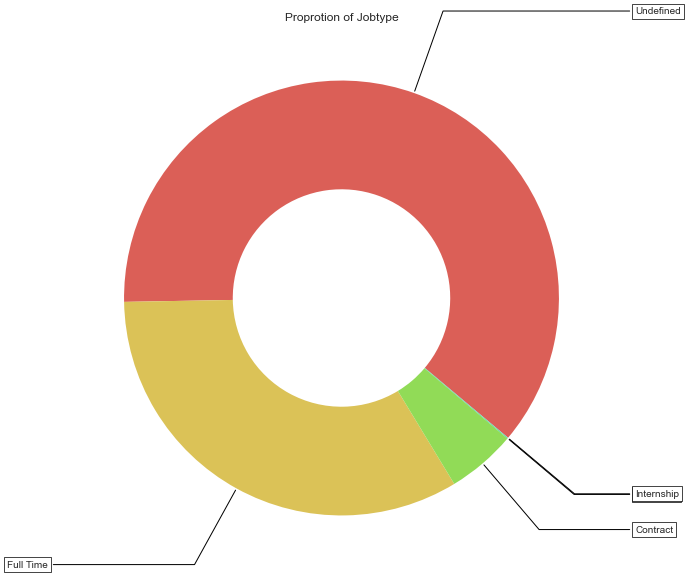

In [17]:
fig, ax = plt.subplots(figsize=(15,10 ), subplot_kw=dict(aspect="equal"))
recipe = df_jobtype.keys()


wedges, texts = ax.pie(df_jobtype, wedgeprops=dict(width=0.5),colors=colors, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Proprotion of Jobtype")

plt.show()

#### Question 2 : What are Top 5 category of company is looking for a Data scientist position?  

In [18]:
#select data by using grouby function
df_clean2 = dataset_clean[dataset_clean['category']!='Unknown']
df_category = df_clean2['category'].value_counts(ascending=False)[:5]
df_category

Computer-or-internet                 1311
computer jobs                         862
life physical and social science      680
Engineering-or-architecture           658
business and financial operations     569
Name: category, dtype: int64

Text(0.5, 1.0, 'Top 5 category type of company')

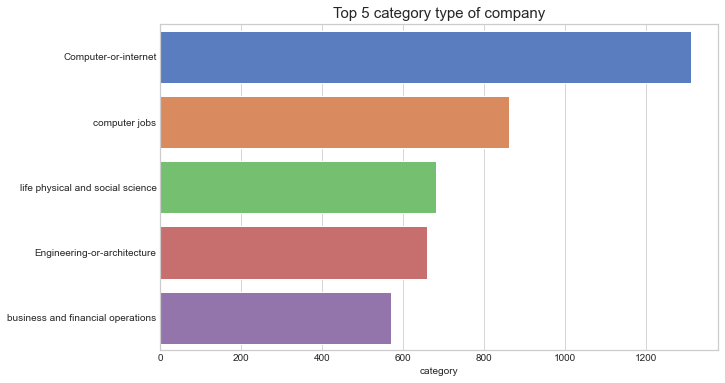

In [19]:
#Seaborn barplot
sns.set_style("whitegrid")
mpl.rcParams['font.size'] = 10
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=df_category, y=df_category.keys(), color=colors, palette="muted",orient='h', )
ax.set_title("Top 5 category type of company", fontsize=15)
# calculate the percentages and annotate the sns barplot

#### Question 3 : What companies are in need of data scientists the most?

In [20]:
#Selection Data
df_company = dataset['company_name'].value_counts(ascending=False)
df_company 

CyberCoders                                              628
Jefferson Frank                                          259
Nigel Frank International US                              88
Taboola                                                   77
Booz Allen Hamilton                                       77
                                                        ... 
AVAST Software a.s.                                        1
Veritude                                                   1
Key Bank- Corporate                                        1
State of Minnesota 290 reviews - Saint Paul, MN 55155      1
CompTech, Inc.                                             1
Name: company_name, Length: 4137, dtype: int64

In [21]:
fig = px.bar(df_company[:10],orientation='h',title='Number of application open')

fig.show()

#### Question 4 : Top 10 city are the most application data scienctist ?

In [22]:
df_bystage = dataset['inferred_state'].value_counts(ascending=False) #ถ้าจะเอาแค่ Top
df_bystage.head(2)

California    1954
New york       805
Name: inferred_state, dtype: int64

<AxesSubplot:title={'center':'number of job in Data Scienctins by stage '}>

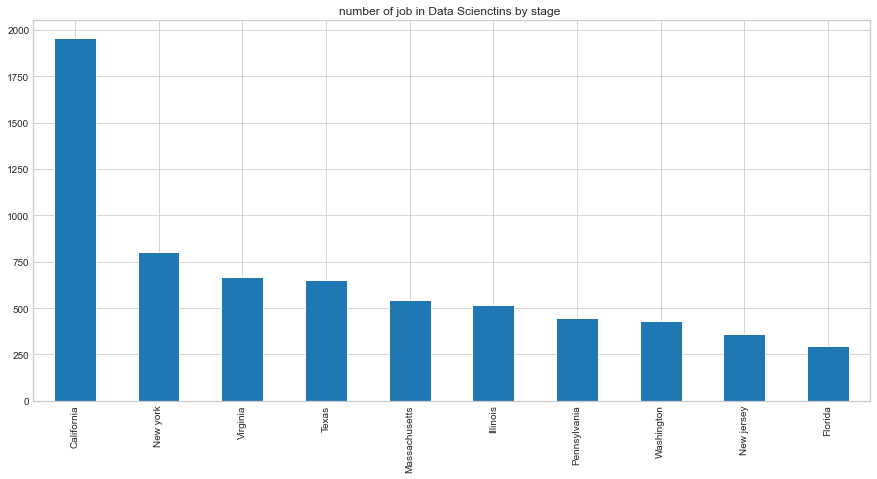

In [23]:
plt.subplots(figsize=(15,7))
df_bystage[:10].plot.bar(title='number of job in Data Scienctins by stage ')

#### Question 5 : When we have the most job application open ?

In [24]:
#Change type of data
dataset_clean['post_date']= pd.to_datetime(dataset_clean['post_date'])

C:\Users\taira\AppData\Local\Temp\ipykernel_32300\790115186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df_date =  dataset_clean.groupby('post_date').count()[3:]
df_date = df_date[ "job_title"]
df_date

post_date
2019-01-02      1
2019-01-03     37
2019-01-04     18
2019-01-05     34
2019-01-07     39
             ... 
2019-12-04     30
2019-12-06     17
2019-12-07    119
2019-12-08     61
2019-12-09     76
Name: job_title, Length: 235, dtype: int64

In [26]:
fig = px.histogram(df_date, x=df_date.index,y=df_date,color_discrete_sequence=['indianred'])
fig.show()

### Question 6 : What are the data scientists' salaries for most?

In [27]:
dataset_salary = dataset_clean[(dataset_clean['salary_offered']!='Unknown')]
df_salary = dataset_salary.groupby(['salary_offered'])#ถ้าจะเอาแค่ Top
#df_salary = df_salary.drop(df_salary.columns[1:12], axis=1)
dataset_salary.head()

job_title               category  \
9404          Data Scientist in Campbell, CA         Data Scientist   
9410         Data Scientist in Arlington, VA         Data Scientist   
9411         Data Scientist in Arlington, VA         Data Scientist   
9412  Junior Data Scientist in Arlington, VA  Junior Data Scientist   
9413        Data Scientist in Birmingham, AL         Data Scientist   

                             company_name        city state country  \
9404  Architecture Technology Corporation    Campbell    CA      US   
9410                           Workbridge   Arlington    VA      US   
9411                            Jobspring   Arlington    VA      US   
9412                            Jobspring   Arlington    VA      US   
9413                     Altec Industries  Birmingham    AL      US   

     inferred_city inferred_state  post_date  \
9404      Campbell     California 2019-08-27   
9410     Arlington       Virginia 2019-09-25   
9411     Arlington       Virginia 2019-09-28   
9412     Arlington       Virginia 2019-09-26   
9413    Birmingham        Alabama 2019-09-23   

                                        job_description   job_type  \
9404  Data Scientist Our Senior Systems Engineers ar...  Full Time   
9410  Job Description A financial company that origi...  Full Time   
9411  Data Scientist A Data Science firm in the D.C....  Full Time   
9412  Junior Data Scientist A Data Science firm in t...  Full Time   
9413  Altec specializes in the manufacture, sale and...  Full Time   

     salary_offered job_board  \
9404   $90K - $150K   Unknown   
9410   $80K - $150K   Unknown   
9411   $80K - $150K   Unknown   
9412   $80K - $150K   Unknown   
9413   $80K - $100K   Unknown   

                                                Keyword  
9404  [data scientist, scientist senior, senior syst...  
9410  [job description, description financial, finan...  
9411  [data scientist, scientist data, data science,...  
9412  [junior data, data scientist, scientist data, ...  
9413  [altec specializes, specializes manufacture, m...

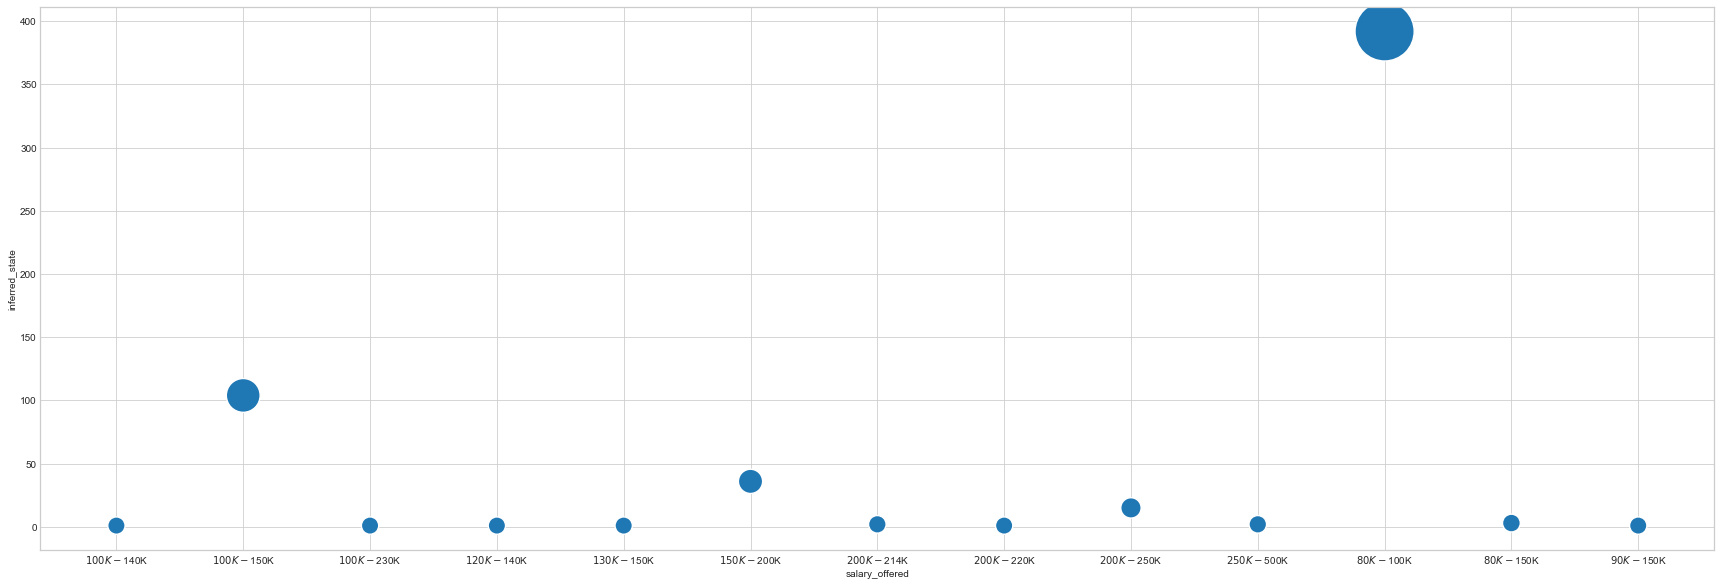

In [28]:
count_number = dataset_salary.groupby('salary_offered').agg({'inferred_state':'count'})
fig = plt.figure(figsize = (30, 10))
 
sns.scatterplot(data=count_number, x=count_number.index, y="inferred_state", size="inferred_state", legend=False, sizes=(300, 3500))
plt.style.use('seaborn-white')
# show the graph
plt.show()

#### Question 7 : What is the salary rate for each state?

<AxesSubplot:xlabel='salary_offered', ylabel='inferred_state'>

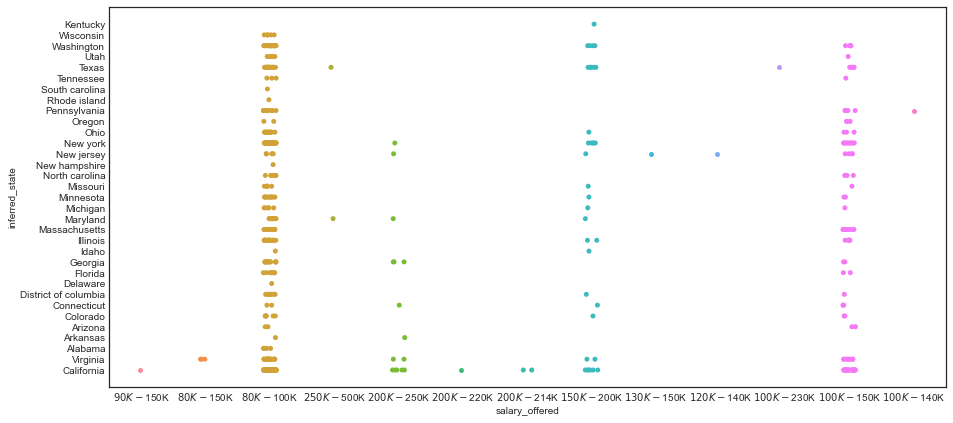

In [29]:
#This plot have problem (if use visual studio code you can run this code with out error but jupyther notebook )
plt.subplots(figsize=(15,7))
sns.stripplot(x='salary_offered', y="inferred_state", data=dataset_salary)

#### Question 8 : What skills are needed to get a data scientist job?

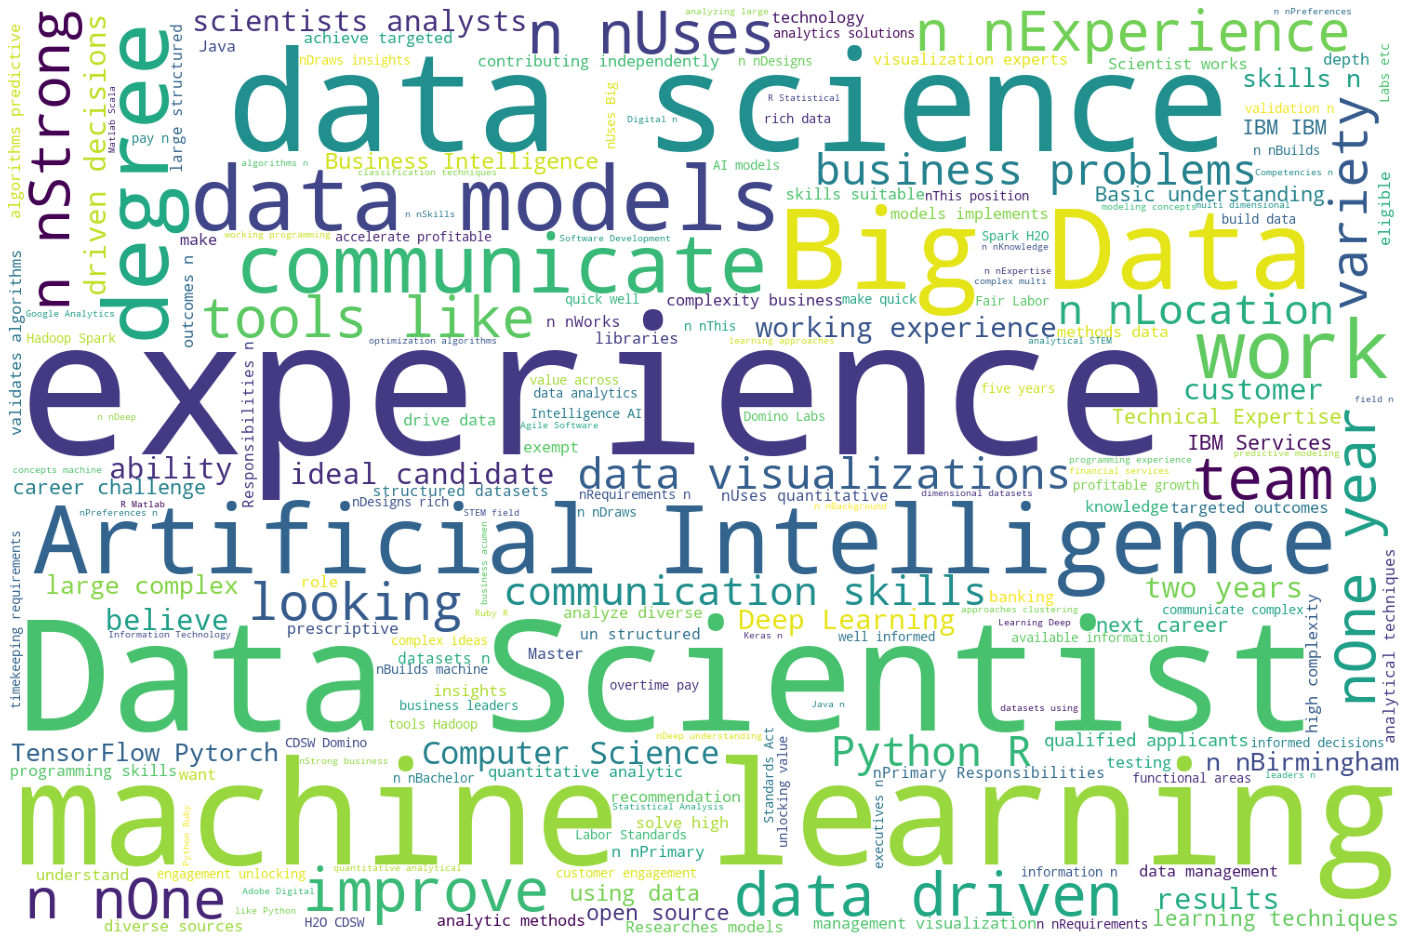

In [30]:
text = dataset_text['job_description'].values 

wordcloud = WordCloud(stopwords = stopwords, background_color = 'white',
                            width = 1500,
                            height = 1000,
                            collocation_threshold = 7 
                            ).generate(str(text))
fig = plt.figure(figsize = (25, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [31]:
#Word cloud function
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=1000, height=500, 
                   background_color= "white", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
    plt.style.use('seaborn-whitegrid')
    plt.rcParams["figure.figsize"] = (80,30)
    plt.title(title) 
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

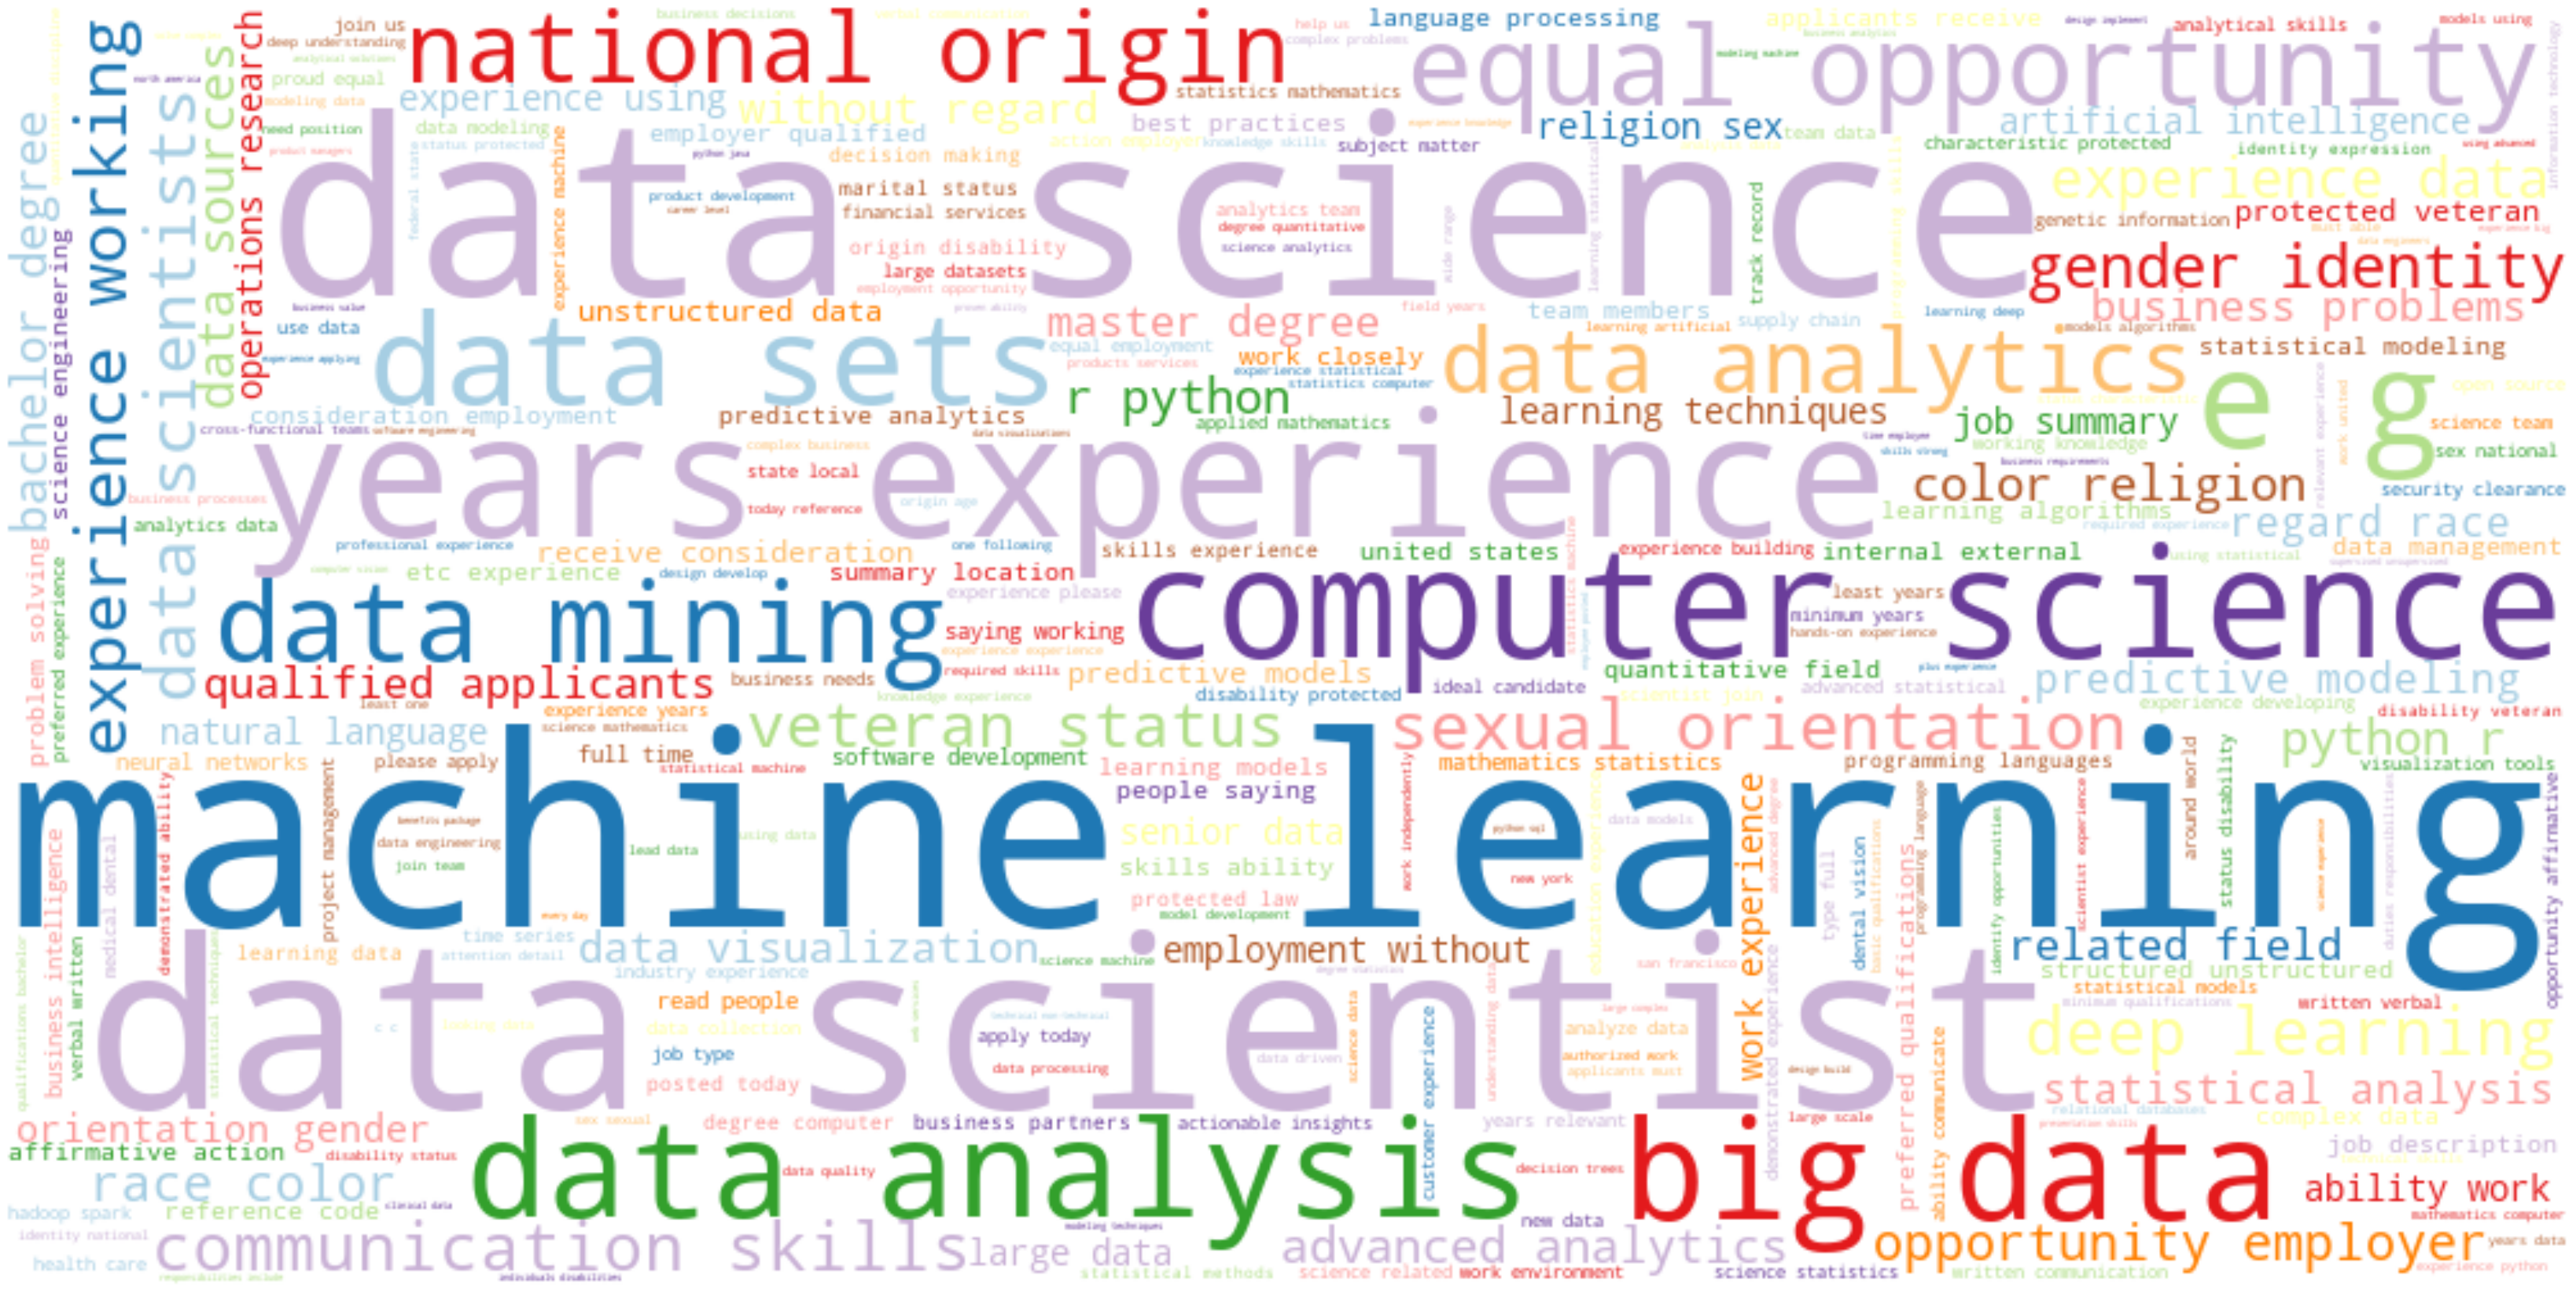

In [32]:
wordcloud(freq_df['freq'], max_words=300)

#### Question 9 : Which website has the most data scientist jobs?

In [33]:
df_clean2 = dataset_clean[dataset_clean['job_board']!='Unknown']
df_job_board = df_clean2['job_board'].value_counts(ascending=False)[:5]
df_job_board

indeed           4466
careerbuilder    1861
monster          1534
dice              420
simplyhired         2
Name: job_board, dtype: int64

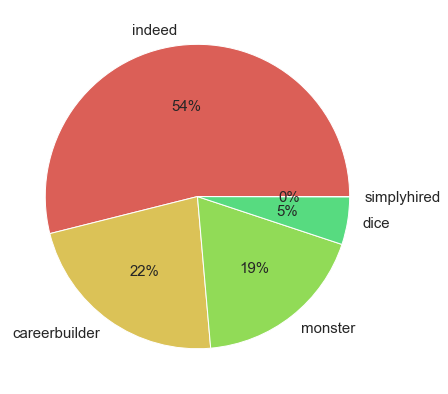

In [34]:
mpl.rcParams['font.size'] = 15
plt.subplots(figsize=(15,7))
plt.pie(df_job_board, labels = df_job_board.keys(), colors = colors, autopct='%.0f%%')
plt.show()